## 3.1 Visualization

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv('gapminder.csv')

In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


Selecting every 20th row, up to row 200.

For all the countries in the world, and for years starting in 1800, this data frame shows us basic facts about life in those countries, the
population, the expected lifetime, that is the average age of death for all born, the percentage of children surviving to age five, the average number of babies per woman, the gross national product divided by population, and the income available, on average, to each citizen each day.

In [6]:
gapminder[0:200:10]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
10,Afghanistan,1900,Asia,5021241.0,27.19,51.823,7.00,793.0,2.171116
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
30,Afghanistan,1965,Asia,9935358.0,34.60,66.590,7.67,1182.0,3.236140
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
70,Afghanistan,2005,Asia,24399948.0,52.00,88.040,6.93,1146.0,3.137577
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
90,Albania,1890,Europe,741688.0,35.40,62.480,4.60,1008.0,2.759754


The number of babies per woman depends strongly on child mortality. With women having more children, when it's harder for them to survive.

To see this, we plot the number of babies per woman on the X axis and the percentage of children surviving to age five on the Y axis.

We do this with numpy-like smart indexing, creating a Boolean expression
within the brackets that index the rows. And then we select the plotting function, and specifically, scatter. Now we can just tell scatter which columns we care about.


<Axes: xlabel='babies_per_woman', ylabel='age5_surviving'>

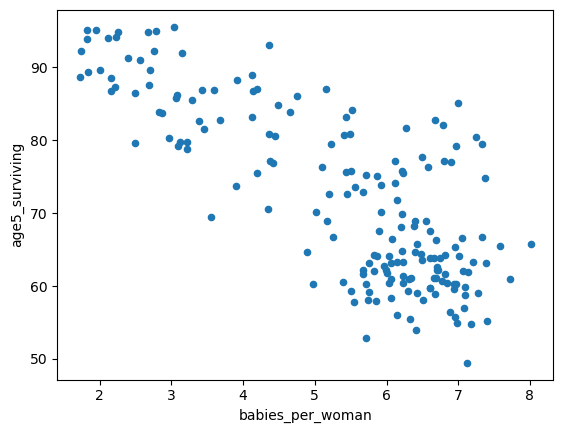

In [7]:
gapminder[gapminder.year == 1940].plot.scatter('babies_per_woman','age5_surviving')

We'll create a functional plot here that creates a scatter plot
for these two variables. 

So we start by down selecting the data, to a specific year. And then we repeat our plotting instructions.

We can make bigger dots based on the number of people in each country. To do that we extract the population column, and we multiply it by a small constant. We also need to tell scatter to use that (size equals area).

Also, let's use different colors for different regions of the world. We select the region from a table, and We will map each value into a different color.

In [18]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = 0.05 * data.gdp_per_capita
    colors = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('babies_per_woman','age5_surviving',
                      s=area,c=colors,
                      linewidths=1,edgecolors='black',
                      figsize=(10,6))
    
    pp.axis(ymin=50,ymax=105,xmin=0,xmax=8)
    pp.xlabel('babies per woman')
    pp.ylabel('% children alive at 5')

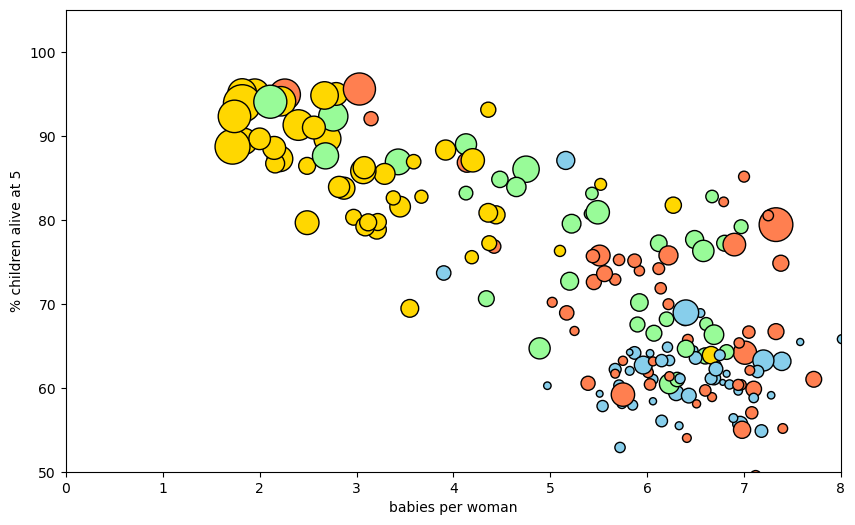

In [19]:
plotyear(1940)

We can go even further, adding interactivity. For that, we will use Jupyter's notebook's ipywidgets, and specifically the method, interact.

We will create a slider widget that lets us select the year. And I can give the widget a range, a step and an initial value.

In [21]:
interact(plotyear,year=widgets.IntSlider(min=1800,max=2015,step=1,value=1940))

interactive(children=(IntSlider(value=1940, description='year', max=2015, min=1800), Output()), _dom_classes=(…

<function __main__.plotyear(year)>